# Tutorial No. 3

## 1. Import Packages


Note: you may need to restart the kernel to use updated packages.


In [7]:
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers import Softmax
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import optimizers

import numpy as np
import cv2 
import os
from glob import glob
import matplotlib.pyplot as plt

## 2. Load Data

In [24]:
def read_data(directory):
# =============================================================================
#  This function gets a directory name and return all images in it concatenated 
#  to each other
# =============================================================================    
    data_list = glob(os.path.join('.','Data' + directory + '*.png'))
    data = np.asarray([cv2.imread(img,0) for img in data_list])
    return data

# read data from directory
x_train = read_data('\Train\Raw\\')
y_train = read_data('\Train\Seg\\')
x_test = read_data('\Test\Raw\\')
y_test = read_data('\Test\Seg\\')

# Change the shape to (n_clss)x(Height)x(Weight)x(channels)
x_train = (np.expand_dims(x_train, axis=3)).astype('float')
x_test =  (np.expand_dims(x_test, axis=3)).astype('float')

# Change labels to categorical
y_train = (to_categorical(y_train)).astype('float')
y_test = (to_categorical(y_test)).astype('float')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (704, 64, 80, 1)
x_test shape: (256, 64, 80, 1)
y_train shape: (704, 64, 80, 3)
y_test shape: (256, 64, 80, 3)


(-0.5, 79.5, 63.5, -0.5)

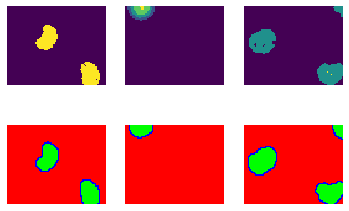

In [25]:
# visualize some images and their segmentation labels
plt.subplot(2,3,1)
plt.imshow(np.squeeze(x_train[150,:,:]))
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(np.squeeze(x_train[295,:,:]))
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(np.squeeze(x_train[650,:,:]))
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(y_train[150,:,:])
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(y_train[295,:,:])
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(y_train[650,:,:])
plt.axis('off')


## 3. Define Parameters 

In [78]:
num_of_clss =   3          # number of classes
lr =      5e-6               # learning rate 
beta_1 =      0.9           # beta 1 - for adam optimizer
beta_2 = 0.99        # beta 2 - for adam optimizer
epsilon =    1e-8            # epsilon - for adam optimizer
epochs =    75           # number of epochs 
bs =       16        # batch size
dp=0.5

## 4. Build CNN Model

In [79]:
model = Sequential()

#DOWNscaling 
model.add(Conv2D(32 ,(3, 3), activation='relu', padding='same'))
model.add(Conv2D(32 ,(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

#UPscaling
model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(128, (3, 3), activation='relu', padding='same'))

#classification
model.add(Conv2DTranspose(num_of_clss, (3, 3), activation='relu', padding='same'))
model.add(Softmax(axis=3))



##  5. Compile the Model

In [80]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# add early stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')


## 6. Train the Model

In [81]:
# Train the model, iterating on the data in batches of 64 samples
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)

Train on 492 samples, validate on 212 samples
Epoch 1/75
492/492 [==============================] - 3s 7ms/step - loss: 1.0980 - acc: 0.9497 - val_loss: 1.0972 - val_acc: 0.9390
Epoch 2/75
492/492 [==============================] - 1s 2ms/step - loss: 1.0962 - acc: 0.9503 - val_loss: 1.0950 - val_acc: 0.9390
Epoch 3/75
492/492 [==============================] - 1s 2ms/step - loss: 1.0930 - acc: 0.9503 - val_loss: 1.0906 - val_acc: 0.9390
Epoch 4/75
492/492 [==============================] - 1s 2ms/step - loss: 1.0859 - acc: 0.9503 - val_loss: 1.0798 - val_acc: 0.9390
Epoch 5/75
492/492 [==============================] - 1s 2ms/step - loss: 1.0661 - acc: 0.9503 - val_loss: 1.0489 - val_acc: 0.9390
Epoch 6/75
492/492 [==============================] - 1s 2ms/step - loss: 1.0130 - acc: 0.9503 - val_loss: 0.9793 - val_acc: 0.9390
Epoch 7/75
492/492 [==============================] - 1s 2ms/step - loss: 0.9425 - acc: 0.9503 - val_loss: 0.9202 - val_acc: 0.9390
Epoch 8/75
492/492 [==========

492/492 [==============================] - 1s 2ms/step - loss: 0.0834 - acc: 0.9759 - val_loss: 0.1142 - val_acc: 0.9663
Epoch 63/75
492/492 [==============================] - 1s 2ms/step - loss: 0.0829 - acc: 0.9763 - val_loss: 0.1131 - val_acc: 0.9672
Epoch 64/75
492/492 [==============================] - 1s 2ms/step - loss: 0.0823 - acc: 0.9768 - val_loss: 0.1136 - val_acc: 0.9673
Epoch 65/75
492/492 [==============================] - 1s 2ms/step - loss: 0.0818 - acc: 0.9771 - val_loss: 0.1136 - val_acc: 0.9677
Epoch 66/75
492/492 [==============================] - 1s 2ms/step - loss: 0.0811 - acc: 0.9774 - val_loss: 0.1115 - val_acc: 0.9685
Epoch 67/75
492/492 [==============================] - 1s 2ms/step - loss: 0.0804 - acc: 0.9776 - val_loss: 0.1127 - val_acc: 0.9684
Epoch 68/75
492/492 [==============================] - 1s 2ms/step - loss: 0.0794 - acc: 0.9776 - val_loss: 0.1088 - val_acc: 0.9693
Epoch 69/75
492/492 [==============================] - 1s 2ms/step - loss: 0.0785

## 7. Visualize

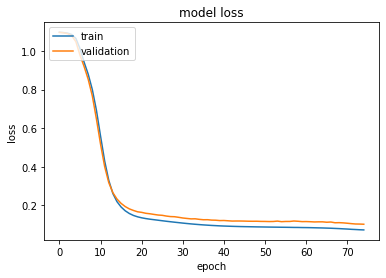

In [82]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()


## 8. Model Evaluation

256/256 [==============================] - 0s 647us/step
test loss: 0.11231672763824463
test accuracy: 0.9696907103061676


(-0.5, 79.5, 63.5, -0.5)

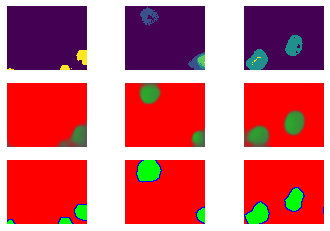

In [83]:
y_pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)

# visualize some images with their prediction and true labels
plt.subplot(3,3,1)
plt.imshow(np.squeeze(x_test[10,:,:]))
plt.axis('off')

plt.subplot(3,3,2)
plt.imshow(np.squeeze(x_test[20,:,:]))
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(np.squeeze(x_test[30,:,:]))
plt.axis('off')

plt.subplot(3,3,4)
plt.imshow(y_pred[10,:,:])
plt.axis('off')

plt.subplot(3,3,5)
plt.imshow(y_pred[20,:,:])
plt.axis('off')

plt.subplot(3,3,6)
plt.imshow(y_pred[30,:,:])
plt.axis('off')

plt.subplot(3,3,7)
plt.imshow(y_test[10,:,:])
plt.axis('off')

plt.subplot(3,3,8)
plt.imshow(y_test[20,:,:])
plt.axis('off')

plt.subplot(3,3,9)
plt.imshow(y_test[30,:,:])
plt.axis('off')